# Part I: Go-Bike Exploration
## by Erik Roulson
## Introduction

This data set includes information about over 180'000 individual rides from 2019 made in a bike-sharing system covering the greater San Francisco Bay area. Information included:
- Duration of journey
- Start and end time, and location of journey
- Bike ID
- User ID, DoB, and gender 

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data set a display preview sample
df_raw = pd.read_csv('201902-fordgobike-tripdata.csv')
df_raw.sample(8)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
116882,288,2019-02-12 07:01:59.0870,2019-02-12 07:06:47.6180,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,66.0,3rd St at Townsend St,37.778742,-122.392741,3346,Subscriber,1990.0,Female,No
139625,416,2019-02-07 20:44:00.6590,2019-02-07 20:50:56.8550,61.0,Howard St at 8th St,37.776513,-122.411306,368.0,Myrtle St at Polk St,37.785434,-122.419622,5369,Subscriber,1992.0,Male,No
111196,85,2019-02-12 17:24:51.7640,2019-02-12 17:26:17.5780,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,4902,Subscriber,1979.0,Male,No
164779,544,2019-02-05 08:06:53.9000,2019-02-05 08:15:58.2620,61.0,Howard St at 8th St,37.776513,-122.411306,285.0,Webster St at O'Farrell St,37.783521,-122.431158,5546,Subscriber,1965.0,Male,No
78979,394,2019-02-18 18:17:38.6900,2019-02-18 18:24:13.1450,114.0,Rhode Island St at 17th St,37.764478,-122.402570,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,6602,Subscriber,1993.0,Male,No
84966,182,2019-02-17 16:24:36.5300,2019-02-17 16:27:39.1560,100.0,Bryant St at 15th St,37.767100,-122.410662,124.0,19th St at Florida St,37.760447,-122.410807,6428,Subscriber,1959.0,Male,No
127507,2545,2019-02-10 15:05:26.3300,2019-02-10 15:47:51.4390,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,5342,Customer,2000.0,Male,No
54004,5694,2019-02-21 12:39:34.0470,2019-02-21 14:14:28.6580,73.0,Pierce St at Haight St,37.771793,-122.433708,377.0,Fell St at Stanyan St,37.771917,-122.453704,4972,Customer,1996.0,Female,No


In [3]:
# Display number of entries and variables
df_raw.shape

(183412, 16)

In [4]:
# Display data types and non-null value counts
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Display number of unique values for each variable
df_raw.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

### Initial observations

- There is a small proportion of null values for the variables: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender
- Several variables are of an innapropriate data type
- Duration is measured in seconds
- There is no data for distance travelled

### Cleaning steps

- Drop columns I don't intend to use:
    - start_station_id, end_station_id, bike_id, bike_share_for_all_trip
- Drop entries with null values
- Assign the following variable - data types:
    - start_time, end_time - datetime
    - user_type - catagorical
    - member_birth_year - int64
- Add a column for duration measured in minutes. This is easy to interpret for visualisations but I will keep the duration_sec column for calculations.
- Add a column for age and then drop the member_birth_year column
- Add a column for distance travelled using the coordinates and then drop these columns
- Add a column for average speed using the duration and distance columns


In [6]:
# Make a copy of the original dataset to revert back to if needed
df = df_raw.copy()

In [7]:
# Drop unused columns
df.drop(['start_station_id', 'end_station_id', 'bike_id', 'bike_share_for_all_trip'],
        axis = 1, inplace = True)

# Check columns
df.head(0)

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender


In [8]:
# Drop all entries with null values
df.dropna(inplace = True)

# Check Non-Null Count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_name       174952 non-null  object 
 4   start_station_latitude   174952 non-null  float64
 5   start_station_longitude  174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   end_station_latitude     174952 non-null  float64
 8   end_station_longitude    174952 non-null  float64
 9   user_type                174952 non-null  object 
 10  member_birth_year        174952 non-null  float64
 11  member_gender            174952 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 17.4+ MB


In [9]:
# Change data types
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.member_birth_year = df.member_birth_year.astype('int64')

# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   user_type                174952 non-null  category      
 10  member_birth_year        174952 non-null  int64         
 11  member_gender            174952 non-null  category      
dtypes: category(2), 

In [10]:
# Add column for journey duration in minutes
df['duration_min'] = df.duration_sec/60

# I am now going to drop values for journeys over one hour as these are likely not
# constant travel and will produce outliers for speed calculations.

indeces = df[df['duration_min'] > 60].index
df.drop(indeces, inplace = True)

# Comparing with the count above this has removed only a small proportion of the data

df.duration_min.describe()

count    173566.000000
mean         10.308359
std           7.396235
min           1.016667
25%           5.350000
50%           8.450000
75%          13.000000
max          59.933333
Name: duration_min, dtype: float64

In [11]:
# Add a column for age and remove DoB
df['age'] = 2019 - df.member_birth_year
df.drop(['member_birth_year'], axis = 1, inplace = True)

# Remove any entires with an age value over 100
indeces = df[df['age'] > 80].index
df.drop(indeces, inplace = True)

# Check age distribution
df.age.describe()

count    173374.000000
mean         34.119389
std           9.873882
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          80.000000
Name: age, dtype: float64

In [12]:
# Add a column for distance travelled calculated using the coordinates
# Function for converting degrees to radians
def degrees_to_radians(degrees):
    return degrees * np.pi / 180

# Function for calculating distance between two points
def distance(lat1, lon1, lat2, lon2):
    earth_radius_Km = 6371

    d_lat = degrees_to_radians(lat2-lat1)
    d_lon = degrees_to_radians(lon2-lon1)

    lat1 = degrees_to_radians(lat1)
    lat2 = degrees_to_radians(lat2)

    a = np.sin(d_lat/2) * np.sin(d_lat/2) + np.sin(d_lon/2) * np.sin(d_lon/2) * np.cos(lat1) * np.cos(lat2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
    return 6371 * c
    
# Adding distance column
df['distance'] = distance(df.start_station_latitude, df.start_station_longitude, 
                          df.end_station_latitude, df.end_station_longitude)

# Dropping entries with a distance value of 0 as this indicates the bike returned to the same station. 
# Calculating speed from these results would create errors
indeces = df[df['distance'] == 0.000000].index
df.drop(indeces, inplace = True)

# Drop coordinate columns
df.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
       axis = 1, inplace = True)

# Check columns and calculation
df.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,duration_min,age,distance
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,26.416667,45,2.409301


In [13]:
# Add column for speed
df['speed'] = df.distance / (df.duration_min / 60)

# Check columns and calculation
df.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,duration_min,age,distance,speed
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,26.416667,45,2.409301,5.47223


## Univariate Exploration

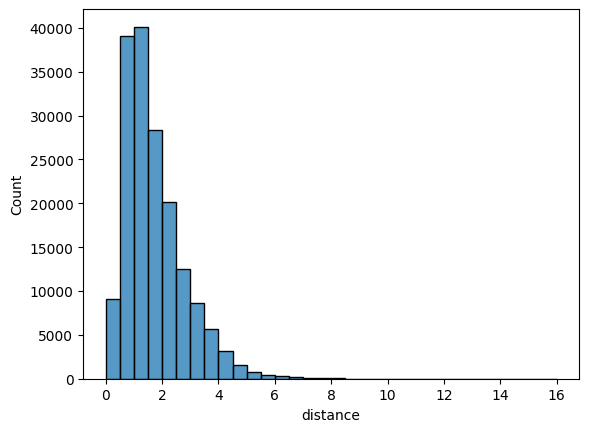

In [14]:
# Create a histogram of distance with custom bin size
bins = np.arange(0, df['distance'].max()+0.5, 0.5)
sns.histplot(data=df, x='distance', bins=bins);

This shows us that the vast majority of journeys are under 3km with the mode being around 1km

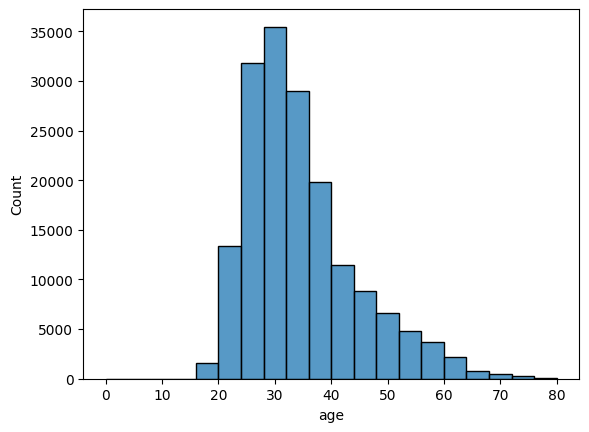

In [15]:
# Create a histogram of age with custom bin size
bins = np.arange(0, df['age'].max()+4, 4)
sns.histplot(data=df, x='age', bins=bins);

This shows us that most users are between 20 and 40 years old with a spike around 30, afterwhich it declines exponentially.

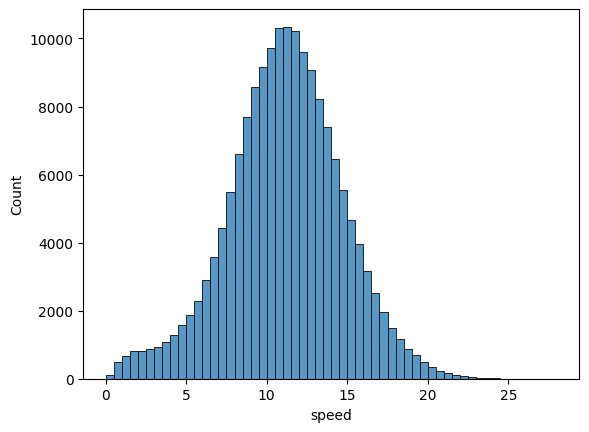

In [16]:
# Create a histogram of age with custom bin size
bins = np.arange(0, df['speed'].max()+0.5, 0.5)
sns.histplot(data=df, x='speed', bins=bins);

This shows an almost symetrical bell curve with 11-12kph being the most common speed.

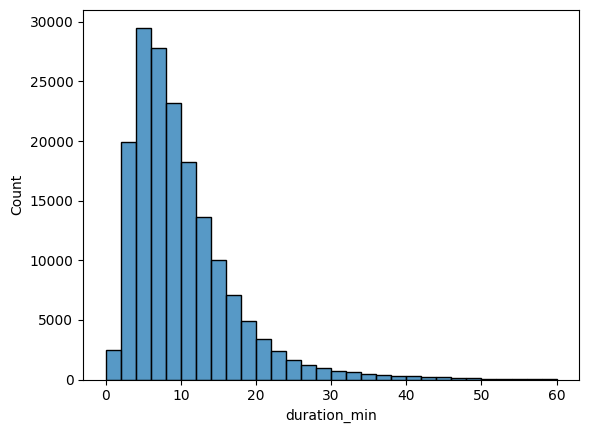

In [17]:
# Create a histogram of duration with custom bin size
bins = np.arange(0, df['duration_min'].max()+2, 2)
sns.histplot(data=df, x='duration_min', bins=bins);

Duration shows a similar distribution as distance with most journeys being under 15 minutes.

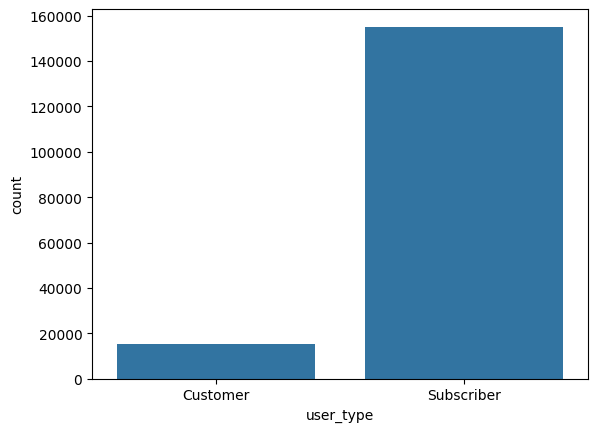

In [18]:
# Create a count plot of user_type
sns.countplot(data=df, x='user_type', color='tab:blue');

There are far more subscribers than customers. This indicates mose users are local and use the service repeatedly rather than visiting tourists using it to see the sights of San Francisco

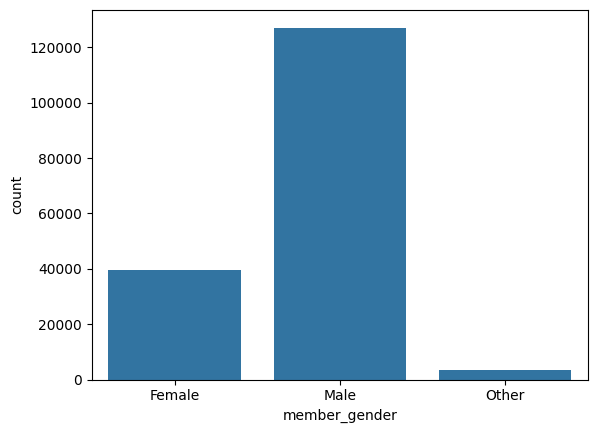

In [19]:
# Create a count plot of gender
sns.countplot(data=df, x='member_gender', color='tab:blue');

Men account for roughly three times the number of users as women. According to Neilsberg Research there are 21,373 fewer women in San Francisco than men, however the population of San Francisco is so great that this equates to less than a 3% disparity.

## Bivariate Exploration

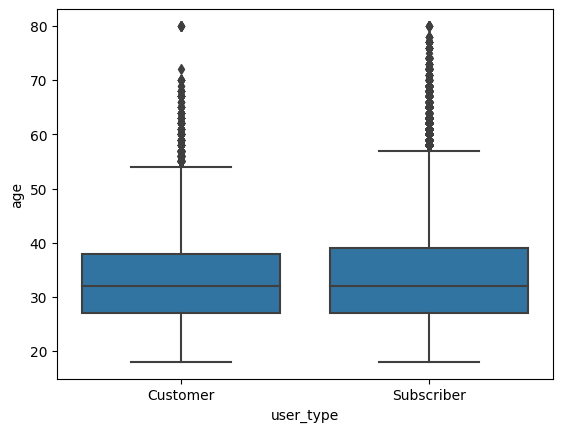

In [26]:
# Create a box plot of age to compare user types
sns.boxplot(data=df, x='user_type', y='age', color='tab:blue');

There appears to be very little difference in the age distribution of each user type. The slight increase in IQR and the number of outliers for the subscribers may be a result of there being so many more data points for that user type.

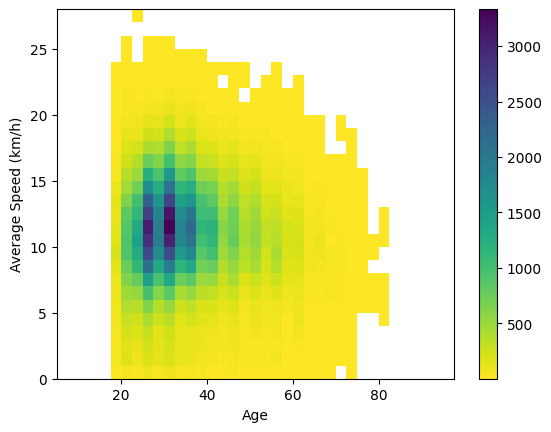

In [21]:
# Create a heat map of age against speed with custom bin size
bins_x = np.arange(5, 97+2.5, 2.5)
bins_y = np.arange(0, 28+1, 1)

plt.hist2d(data=df, x='age', y='speed', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.colorbar();
plt.xlabel('Age')
plt.ylabel('Average Speed (km/h)');

The shape of the heat map shows us that as age increases the average speed of the journey decreases, while the colouring shows that most users fall within a tight grouping of early 20s to mid 30s with a speed of 8 to 15kph.

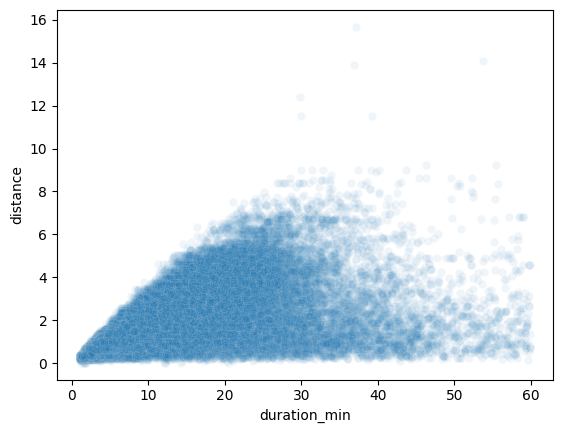

In [22]:
# Create a scatter plot of duration against distance
sns.scatterplot(data=df, x='duration_min', y='distance', alpha = 1/15);

I have added some transparency to the data points to make this visualistion easier to interpret. From this scatter plot we see a clear limit to most users' speed by the definition of the diaganol boundary with very few outliers above.

## Multivariate Exploration

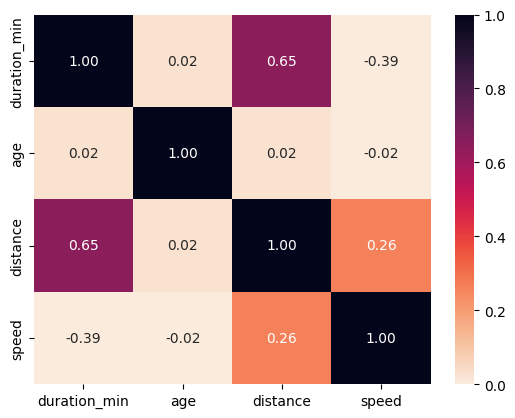

In [23]:
# Create a correlation heat map matrix for the numeric data being observed
cols = ['duration_min', 'age', 'distance', 'speed']
sns.heatmap(df[cols].corr(), cmap='rocket_r', annot=True,
          fmt='.2f', vmin=0);

This correlation heat map shows that the only pair of numeric variables with much correlation are distance and duration. What is surprising is that despite speed being calculated from the other two it shows little correlation with either. Age also shows no correlation with any other numeric variables which shows that despite younger people accounting for the highest speeds recorded there is far too much variance in this for their to be a correlation.

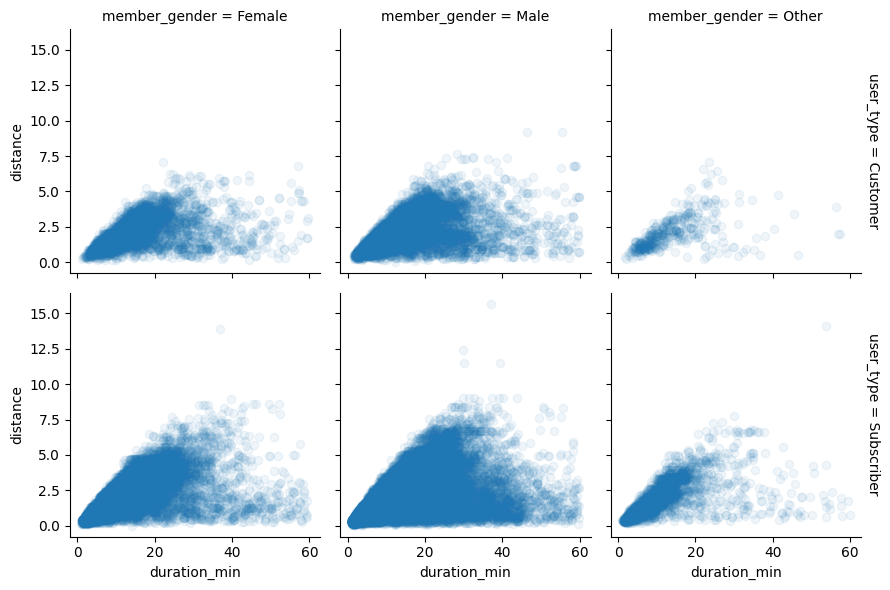

In [24]:
# Create a facet grid plot to show duration against distance, split by gender and user type
g = sns.FacetGrid(data=df, col = 'member_gender', row = 'user_type', margin_titles=True);
g.map(plt.scatter, 'duration_min','distance', alpha = 1/15);

The only discernable difference between genders is that there are far more data points for men. There is however a slight difference between the user types in the shape created by the plot.

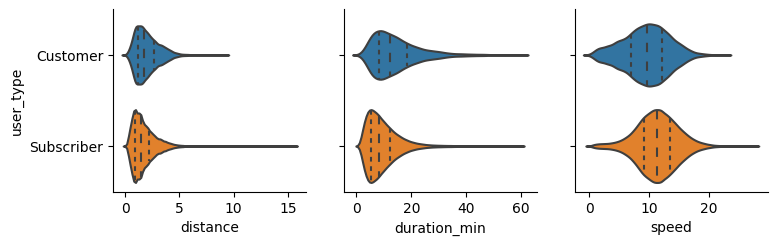

In [28]:
# Create a pair grid to compare user type in terms of distance, duration, and speed

g = sns.PairGrid(data=df, x_vars=['distance', 'duration_min', 'speed'],
                y_vars=['user_type'])
g.map(sns.violinplot, inner='quartile');

This shows that subscribers cover slight less distance on average but are consistently faster and spend less time on the bikes as a result.

## Conclusions

Most of the extra cleaning or data conversion was relatively trivial e.g. converting DoG to age, however, in order to answer any questions relating to the speed or distance of a journey I first needed to calculate this from the coordinate values. 

### Summary Findings

I found that there is little correlation between any of the variables I looked at here, although each showed a distinct distribution such that it would be fair to say that most journeys recorded are undertaken by a man around the age of 30, travelling at 11kph for about 10 minutes.

As indicated by the final visualisations, it appears that the average speed of the subscriber is greater than that of the user (this is shown by the gradient of the resulting cone of data points on scatter plots). The violin plots shows this relationship clearer.